In [1]:
import pandas as pd
import numpy as np

# Data for final consumption and total output

## Final consumption

In [2]:
fdata = pd.read_csv('fdata_esp.csv', sep = ',')
fdata.head()

,Unnamed: 0,f,fmin,fmax,f.maxF,f.maxX
0,A01,22067.825137,0,19878.183746,1.987818e+04,19878.183746
1,A02,491.390952,0,449.053800,3.435896e-11,0.000000
2,A03,2136.674970,0,1923.204924,1.923205e+03,1923.204924
3,B,7537.433840,0,6785.237797,3.846149e+03,3845.767925
4,C10-C12,77720.433660,0,69972.411738,5.427950e-09,9006.175456


In [3]:
f = fdata.iloc[:,1].astype('float')
f_max = np.array(fdata.iloc[:,3].astype('float'))
f_max
f.shape

(55,)

In [4]:
demand_shock = np.zeros(f_max.shape[0])
for i in range (0,f_max.shape[0]):
    demand_shock[i] = round(1- f_max[i]/f[i],3)
    
print(demand_shock) # ok 

[ 0.099  0.086  0.1    0.1    0.1    0.1    0.1    0.1    0.099  0.1
  0.099  0.093  0.099  0.1    0.1    0.1    0.099  0.1    0.1    0.1
  0.099  0.099  0.1    0.008  0.009  0.025  0.099  0.1    0.095  0.095
  0.388  0.275  0.247  0.197  0.022  0.755  0.054  0.038  0.016  0.095
  0.038  0.008  0.019  0.001  0.079  0.093  0.079  0.091  0.035  0.042
  0.007  0.01   0.001  0.043 -0.   ]


In [5]:
demand_shock = np.array(demand_shock)

## Total output

In [113]:
xdata =  pd.read_csv('xdata_esp.csv', sep = ',')
xdata.head()   

,Unnamed: 0,x,xmin,xmax,x.maxF,x.maxX
0,A01,55296.202212,0,55296.202212,26979.266525,29126.656345
1,A02,1280.146466,0,192.023581,192.023581,192.023581
2,A03,3627.285823,0,3627.285823,2320.350569,2381.333167
3,B,8061.338000,0,4166.069492,4166.069492,4166.069492
4,C10-C12,177754.573395,0,131603.349214,27951.943564,41389.199799


In [7]:
x = xdata.iloc[:,1].astype('float')
x_max = np.array(xdata.iloc[:,3].astype('float'))

In [8]:
supply_shock = np.zeros(x_max.shape[0])
for i in range (0,x_max.shape[0]):
    supply_shock[i] = round(1- x_max[i]/x[i],6)
    
print(supply_shock) # ok: corresonds to the data 

[0.       0.849999 0.       0.483204 0.259635 0.685309 0.730686 0.
 0.       0.064001 0.525183 0.       0.705058 0.639448 0.726353 0.662572
 0.430758 0.630639 0.618354 0.696668 0.597033 0.596618 0.606449 0.058407
 0.       0.       0.715557 0.27312  0.299699 0.256656 0.       0.
 0.242194 0.       0.       0.646411 0.07561  0.109813 0.       0.144301
 0.       0.       0.       0.512768 0.181406 0.459166 0.410839 0.396788
 0.19581  0.543278 0.       0.460076 0.       0.559507 0.      ]


In [9]:
supply_shock = np.array(supply_shock)

# IO table 

In [10]:
df = pd.read_csv('esp_wiot.csv',sep = ',',low_memory=False)
df.head()

,Unnamed: 0,A01,A02,A03,B,C10-C12,C13-C15,C16,C17,C18,...,M71,M72,M73,M74_M75,N,O84,P85,Q,R_S,T
0,A01,0.036044,0.005051,0.004090,1.829061e-04,0.154009,0.020155,4.271070e-04,0.002918,3.278248e-04,...,2.067310e-04,0.000593,2.223937e-04,2.182217e-04,4.122063e-04,0.000796,0.000661,0.000947,0.002079,0
1,A02,0.000224,0.036896,0.000007,1.489546e-04,0.000306,0.000041,2.178111e-02,0.023392,3.250353e-07,...,5.292217e-07,0.000004,4.415084e-07,7.452870e-07,8.399119e-07,0.000003,0.000001,0.000001,0.000005,0
2,A03,0.000780,0.000000,0.023371,9.294775e-07,0.004311,0.000101,2.354406e-07,0.000064,0.000000e+00,...,3.279189e-07,0.000019,0.000000e+00,0.000000e+00,0.000000e+00,0.000081,0.000250,0.000251,0.000030,0
3,B,0.000066,0.000050,0.000099,1.667939e-04,0.000065,0.000106,1.365677e-04,0.000126,6.687052e-05,...,2.391449e-04,0.000050,5.490456e-05,4.593785e-05,2.998228e-05,0.000034,0.000016,0.000056,0.000027,0
4,C10-C12,0.217493,0.001697,0.070624,3.893840e-03,0.296567,0.030230,5.516487e-03,0.020444,5.226470e-03,...,3.152230e-03,0.004704,3.921158e-03,1.320034e-02,3.923160e-03,0.006022,0.006058,0.012565,0.008250,0


In [11]:
df = df.iloc[:,1:]# leaving out industries U and T
df = df.astype('float')
df.shape

(55, 55)

In [12]:
A = np.array(df)
N = A.shape[0]
A.shape

(55, 55)

## Matrix Z

In [13]:
df_Z = pd.read_csv('esp_Zmatrix.csv', sep=',', low_memory=False)
df_Z =  df_Z.iloc[:,1:]# leaving out industries U and T
df_Z = df_Z.astype('float')
df_Z.shape

(55, 55)

In [14]:
Z = np.array(df_Z)
N = Z.shape[0]
Z.shape

(55, 55)

In [15]:
x_0 = np.array(x)
x_0.shape

(55,)

In [16]:
f_0 = np.array(f)
f_0.shape

(55,)

In [17]:
L = np.linalg.inv(np.identity(N)-A)
L.shape

(55, 55)

## Direct shock

In [18]:
direct_shock = (sum(x_max)/sum(x_0),sum(f_max)/sum(f_0))
direct_shock

(0.667152373153642, 0.8722617750326123)

# Optimization 

In [19]:
from scipy.optimize import linprog

In [20]:
def max_output(N,L,A,xmax,fmax):
    z = np.ones(N)
    obj = -np.matmul(np.matrix.transpose(z), L)
    lhs_ineq = np.concatenate((-L,L))
    rhs_ineq = np.concatenate((np.zeros(N), xmax))
    
    bnd = []
    for i in range (0,N):
        bnd.append((0,fmax[i]))
    
    result = linprog(c = obj, A_ub= lhs_ineq, b_ub= rhs_ineq, bounds = bnd)
    
    optimal_output = -result.fun
    
    optimal_f = np.ones(N)
    for i in range(0,N):
        optimal_f[i] = result.x[i]
    
    return optimal_output, optimal_output/sum(x_0), sum(optimal_f)/sum(f_0)

In [21]:
result = max_output(N,L,A,x_max,f_max)
Max_output = (result[1], result[2])
Max_output

(0.5314708441396939, 0.5595152879438924)

In [22]:
def max_consumption(N,L,A,xmax,fmax):
    z = np.ones(N)
    obj2 = -np.matmul(np.matrix.transpose(z), np.identity(N)-A)
    lhs_ineq2 = np.concatenate((-(np.identity(N)-A), np.identity(N)-A))
    rhs_ineq2 = np.concatenate((np.zeros(N), fmax))
    
    bnd2 = []
    for i in range (0,N):
        bnd2.append((0,xmax[i]))
        
    result2 = linprog(c = obj2, A_ub= lhs_ineq2, b_ub= rhs_ineq2, bounds= bnd2)
    optimal_f_2 = -result2.fun
    
    optimal_output_2 = np.ones(N)
    for i in range(0,N):
        optimal_output_2[i] = round(result2.x[i])
        
    return result2.success, sum(optimal_output_2)/sum(x_0), optimal_f_2/sum(f_0)

In [23]:
result2 = max_consumption(N,L,A,x_max,f_max)
Max_consumption = (result2[1], result2[2])
Max_consumption

(0.5294957360027067, 0.5596734687907872)

In [24]:
N= 54
f_max = f_max[:N]
x_max = x_max[:N]
A = A[:N,:N]
Z = Z[:N,:N]
x_0 = x_0[:N]
f_0 = f_0[:N]
L = np.linalg.inv(np.identity(N)-A)
supply_shock = np.array(supply_shock[:N])
demand_shock = np.array(demand_shock[:N])

In [25]:
def algo_proportional(A, L, fmax, xmax, TT, prioritize="no"):
    x = [0]
    fvec = []          # initial demand vector
    fvec.append(fmax)
    r = [0]            # output constraints
    s = [0]            # input bottlenecks 
    d = [0]            # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]

    list_ = [1] 
    t=1
    epsilon = 1e-6
    while not np.all(abs(d[t] - d[t-1]) < epsilon) and t<TT:
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        r.append(np.ones(len(xmax)))
        s.append(np.ones(len(xmax)))
        fvec.append(np.ones(len(xmax)))
        x.append(np.ones(len(xmax)))
        d.append(np.ones(len(xmax)))
        
        ##########################################
        ########### Output constraints ###########
        ##########################################
        for i in range (0,len(x_max)):
            r[t][i] = xmax[i]/d[t][i]
        #print('Output constraints:{}'.format(r[t]))
        
        ##########################################
        ########### Input bottlenecks ############
        ##########################################
        for i in range(0,len(x_max)):
            for j in range(0,len(x_max)):
                if A[j][i] > 0:
                    list_.append(r[t][j])
            s[t][i] = min(list_)
            list_ = [1]
        #print('Input bottlenecks:{}'.format(s[t]))
        
        ##############################################
        ########### Constrained Production ###########
        ##############################################
        for i in range(0,len(xmax)):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
        #print('Constrained production:{}'.format(x[t]))
        
        ##############################################
        ############ Constrained Delivery ############
        ##############################################
        for i in range(0,len(xmax)):
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],x[t]),0)
        #print('Constrained delivery:{}'.format(fvec[t]))
        
        ###############################################
        ############ New Aggregated Demand ############
        ###############################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
        t=t+1
        #print('Aggregated Demand:         {}'.format(d[t]))
        if t == TT:
            print("Algoritm did not converge")
            
    return sum(x[t-1]), sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0), t


In [26]:
result_proportional = algo_proportional(A, L, f_max, x_max, 30, prioritize="no")
result_proportional

(371276.4780683448, 0.14526842096652606, 0.14663857621015908, 3)

In [27]:
def algo_mixed(A, L, fmax, xmax, TT,prioritize="yes"):
    x = [0]
    fout = [0]
    fvec = [] # initial demand vector
    fvec.append(fmax)
    r = [0]   # output constraints
    s = [0]   # input bottlenecks 
    d = [0]   # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]
    
    list_ = [1] 
    t=1
    epsilon = 1e-6
    while not np.all(abs(d[t] - d[t-1]) < epsilon) and t<TT:
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        r.append(np.ones(len(xmax)))
        s.append(np.ones(len(xmax)))
        fvec.append(np.ones(len(xmax)))
        x.append(np.ones(len(xmax)))
        d.append(np.ones(len(xmax)))
        fout.append(np.ones(len(xmax)))
        
        ##########################################
        ########### Output constraints ###########
        ##########################################
        for i in range (0,len(x_max)):
            r[t][i] = xmax[i]/np.matmul(A[i],d[t])
        #print('Output constraints:         {}'.format(r[t]))
        
        ##########################################
        ########### Input bottlenecks ############
        ##########################################
        for i in range(0,len(x_max)):
            for j in range(0,len(x_max)):
                if A[j][i] > 0:
                    list_.append(r[t][j])
            s[t][i] = min(list_)
            list_ = [1]
        #print('Input bottlenecks:         {}'.format(s[t]))
        
        ##############################################
        ########### Constrained Production ###########
        ##############################################
        for i in range(0,len(xmax)):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
            #print(s[t][i]*d[t][i])
        
        ##############################################
        ############ Constrained Delivery ############
        ##############################################
        
        for i in range(0,len(xmax)):
            fout[t][i] = s[t][i]*d[t][i]
            #print(s[t][i]*d[t][i])
        
        for i in range(0,len(xmax)):
            #print(np.matmul(A[i],s[t]*d[t]))
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],fout[t]),0) 
        #print('Constrained delivery:      {}'.format(fvec[t]))
        
        ###############################################
        ############ New Aggregated Demand ############
        ###############################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
        t=t+1
    
    if t == TT:
        print("Algoritm did not converge")
        
    return sum(x[t-1]), sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0), t

In [28]:
result_mixed = algo_mixed(A, L, f_max, x_max, 30, prioritize="yes")
result_mixed

(612092.1202608339, 0.23949175627543068, 0.2417338188718643, 3)

In [29]:
def order(A, L, fmax):
    d = np.matmul(L, fmax)
    list_1 = []      # list we will sort
    list_2 = []      # list that will not be sorted to find the original indices
    for i in range(A.shape[0]):
        list_1.append([])
        list_2.append([])
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            list_1[i].append(A[i][j]*d[j])    # list_1[i][j] = list_2[i][j] = A[i][j]*d[j]
            list_2[i].append(A[i][j]*d[j])
        list_1[i].sort(reverse = True)        # we sort list_1: A[i][j]*d[j] >= A[i][j+1]*d[j+1]

    names_ordered=[]
    for i in range(A.shape[0]):
        names_ordered.append([])
    
    for i in range(A.shape[0]):
        for k in list_1[i]:                  # we take the indices of the j+1 (j from 0 to N-1) biggest suppliers of industry i. 
                for l in range(A.shape[0]):    
                    if list_2[i][l] == k:
                        names_ordered[i].append(l)   
    return names_ordered

In [84]:
def algo_priority(A, L, fmax, xmax, ordered, TT= 30, prioritize="yes"): 
    fout = [0]                
    x = [0]
    fvec = []   # initial demand vector
    fvec.append(fmax)
    rvec = [0]  # output constraints
    s = [0]     # input bottlenecks 
    d = [0]     # aggregated demand vector 
    d.append(np.matmul(L, fvec[0])) #d[1] = L*f[0]
    
    list_ = [1] 
    t=1
    epsilon = 1e-6
    
    while not np.all(abs(d[t] - d[t-1]) < epsilon) and t<TT:
        #print('\nIteration {0}'.format(t))
        #print('---------')
        #print('Initial aggregated demand: {}'.format(d[t]))
        rvec.append([np.zeros(N)])
        s.append(np.ones(N))
        fvec.append(np.ones(N))
        x.append(np.ones(N))
        fout.append(np.ones(N))
        d.append(np.ones(N))
        demand = np.identity(N)
        
        som = 0
        for i in range(0,N):
            for j in range(0,N):
                for k in ordered[i][:j+1]:
                    som = som + A[i][k]*d[t][k] 
                demand[i][j] = som   #demand[i][j] = demand of j'th biggest customers of firm i summed up
                som = 0
        remainder = np.identity(N)
    
        for i in range(0,N):
            for j in range(0,N):
                remainder[i][j] = xmax[i] - demand[i][j]
                
        ####################################################
        ####################### rvec #######################
        ####################################################
        for i in range(0,N):
            rvec[t].append([])
        for i in range(0,N):
            if all(remainder[i][j]>0 for j in range(0,N)):
                rvec[t][i] = np.ones(N) 
            elif all(remainder[i][j]<=0 for j in range(0,N)): 
                rvec[t][i] = np.zeros(N)
                for k in ordered[i][:1]: 
                    rvec[t][i][k] = xmax[i]/demand[i][0]
        
            else: 
                idx = np.where(remainder[i]<=0) # index for partially met demand
                idx_fully = np.where(remainder[i]>0) 
                length = len(idx_fully[0])
                rvec[t][i] = np.zeros(N)
                for l in range(0,length-1):
                    index = ordered[i][l]
                    rvec[t][i][index] = 1
                m = ordered[i][length-1]
                rvec[t][i][m] = remainder[i][length-1]/(demand[i][length]-demand[i][length-1])
          
        #####################################################
        ################# Input bottlenecks #################
        #####################################################
        for i in range(0,N):
            for j in range(0,N):
                if A[j][i]>0:
                    list_.append(rvec[t][j][i])
            s[t][i] = min(list_)
            list_ = [1]   
        #print('Input bottlenecks:         {}'.format(s[t]))
        
        ######################################################
        ############### Constrained Production ###############
        ######################################################
        for i in range(0,N):
            x[t][i] = min(xmax[i], s[t][i]*d[t][i])
        #print(x)
        for i in range(0,N):
            fout[t][i] = s[t][i]*d[t][i]
        ######################################################
        ################ Constrained Delivery ################
        ######################################################
        for i in range(0,len(xmax)):
            fvec[t][i] = max(x[t][i] - np.matmul(A[i],fout[t]),0)
        
        ######################################################
        ################ Aggregated demand ###################
        ######################################################
        for i in range(0,len(xmax)):
            d[t+1][i] = np.matmul(L[i],fvec[t])
            
        t=t+1
        if t==TT:
            print("Algorithm did not converge")
            #return(None, None)
        #print(d[t])
    return sum(x[t-1]), sum(x[t-1])/sum(x_0), sum(fvec[t-1])/sum(f_0), t

In [31]:
names_ordered = order(A,L,f_max)
result_priority = algo_priority(A, L, f_max, x_max, names_ordered,TT=30, prioritize="yes")
result_priority

(0.0, 0.0, 0.0, 3)

In [32]:
from random import randrange

In [88]:
def algo_random(A, L, fmax, xmax, runs, prioritize = "random"):
    som_x = []
    x = []
    y = []
    TT = 30
    while len(x)<runs:
        random_ordered=[]
        for i in range(N):
            random_ordered.append([])
    
        for i in range(N):
            while len(random_ordered[i])<N:
                random = randrange(N)
                while random in random_ordered[i]:
                    random = randrange(N)# we willen nu de indices van de j+1 (j van 0 tot en met N-1) grootste suppliers  
                random_ordered[i].append(random)
                
        result = algo_priority(A, L, fmax, xmax, random_ordered, TT = 25, prioritize="yes")
        if result[3] != TT:
            som_x.append(result[0])
            #som_x = sum(som_x)/len(sum_x)
            x.append(result[1])
            y.append(result[2])
    return sum(som_x)/len(som_x), sum(x)/len(x), sum(y)/len(y)

In [89]:
result_random = algo_random(A, L, f_max, x_max, 100, prioritize = "random")
result_random

(12083.0922543128, 0.00472772135016258, 0.005025058552951074)

# Effect Network Density

In [36]:
N=54
A = np.array(df)[:N,:N]
N = A.shape[0]
A.shape

(54, 54)

In [37]:
Z = np.array(df_Z)[:N,:N]
N = Z.shape[0]
Z.shape

(54, 54)

In [38]:
x_max = np.array(xdata.iloc[:,3].astype('float'))[:N]
x_0 = np.array(x)[:N]
x_0.shape

(54,)

In [39]:
f_max = np.array(fdata.iloc[:,3].astype('float'))[:N]
f_0 = np.array(f)[:N]
f_0.shape

(54,)

In [40]:
N
L = np.linalg.inv(np.identity(N)-A)
L.shape

(54, 54)

In [41]:
supply_shock = np.zeros(N)
for i in range (0,x_max.shape[0]):
    supply_shock[i] = round(1- x_max[i]/x[i],6)
    
len(supply_shock) # ok: corresonds to the data 

54

## Eliminate Random Links

In [42]:
from random import randrange
def eliminate_rand(A, x, f, desired_density):
    #Anew = np.array(df)
    Anew = A
    zeros = np.sum(Anew==0)
    #Znew = np.array(df_Z)
    Znew = Z
    indices_x = []
    indices_y = []
    if desired_density != 1:
        sparselink = round((N**2)*(1-desired_density) - np.sum(Anew==0)) # number of links we need to remove to get desired density
        print("Sparselink: {0}".format(sparselink))
        while(np.sum(Znew==0)) < sparselink + zeros: 
            random_x = randrange(N)
            random_y = randrange(N)
            while Znew[random_x,random_y] == 0:
                random_x = randrange(N)
                random_y = randrange(N)
            #print(random_x,random_y)
            Znew[random_x, random_y] = 0
            #print(Znew[random_x, random_y])
        #indices_x = np.random.randint(0,Anew.shape[0], sparselink)
        #indices_y = np.random.randint(0,Anew.shape[1], sparselink)
        #print(len(indices_x))
        #print(len(indices_y))
        #for i in range(len(indices_x)):
            #print(i)
            #print(indices_x[i], indices_y[i])
            #Znew[indices_x[i], indices_y[i]] = 0
            #Znew[indices_y[i], indices_x[i]] = 0
            #print(Znew[indices_x[i], indices_y[i]])
            
    xnew = np.sum(Znew, axis=1) + f
    for i in range(0,N):
        for j in range(0,N):
            Anew[i][j] = Znew[i][j]/x[j]
    Lnew = np.linalg.inv(np.identity(N)-Anew)
    #xnew = Znew + f
    
    return xnew, Anew, Lnew, Znew

In [43]:
#Test for density = 0.75

newdat = eliminate_rand(A, x_0, f_0, 0.75) #ok: sparselink is correct
print(np.sum(newdat[3]==0)) # Number of zeros = 624 + 132: ok


som = 0
for i in range(N):
    for j in range(N):
        if newdat[1][i][j]>0:
            som = som+1
        else:
            som = som
print(som/N**2) # ok: we get a density of 0.75

xmaxnew = np.ones(N) 
for k in range(0,N):
    xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
    
# We compute the direct shock
sum(xmaxnew)/sum(newdat[0])

#algo_proportional(newdat[1], newdat[2], f_max, xmaxnew, TT = 25, prioritize="no")

Sparselink: 713
729
0.75


0.6682335658905575

In [52]:
#def eliminate_rand(A, x, f, desired_density):
    #A = np.array(df)
 #   Anew = A
  #  Znew = Z
   # sparselink = round((N**2)*(1-desired_density) - np.sum(Anew==0))
    #print(sparselink)
    
    #indices_x = np.random.randint(0,Anew.shape[0], sparselink)
    #indices_y = np.random.randint(0,Anew.shape[1], sparselink)
    #Anew[indices_x, indices_y] = 0
    #Lnew = np.linalg.inv(np.identity(55)-Anew)
    #xnew = np.matmul(Lnew,f_0)
    
    #Znew[indices_x, indices_y] = 0
    #xnew = np.identity(54)
    #for i in range(0,54):
     #   xnew = np.sum(Znew, axis=1) + f
    #Lnew = np.linalg.inv(np.identity(N)-Anew)
    #xnew = Znew + f
    
   # return xnew, Anew, Lnew

### Direct shock

**For 50 different densities, we adapt our matrix. We compute xnew, Anew, xmaxnew. Then we apply the shocks to the new data: instead of sum(xmax)/sum(x) it is now equal to sum(xmaxnew)/sum(xnew).**

In [44]:
densseq = np.linspace(0,1,50)

In [45]:
resdir_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
for i in range(len(densseq)):
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        resdir_x[i][j] = (sum(xmaxnew)/sum(newdat[0]))
resdir_x = np.mean(resdir_x, axis = 1)
    #som = 0
    #for i in range(N):
     #   for j in range(N):
      #      if newdat[1][i][j]>0:
                #som = som+1
       #     else:
        #        som = som
    #print(som/N**2)
    
#dataframe = {'x': resdir_x,
            #'Density': densseq}
#dataframe = pd.DataFrame(dataframe)
#resdir_x = np.array(resdir_x.astype('float'))
#x_dir = np.array(dataframe.iloc[:,0].astype('float'))
#densityseq = np.array(dataframe.iloc[:,1].astype('float'))
#densityseq.shape

resdir_x

Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 28

Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 23

Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 17

Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 11

Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparseli

array([0.63671461, 0.63770195, 0.63871385, 0.64009173, 0.64195838,
       0.64092993, 0.64221228, 0.64229868, 0.6428157 , 0.64450842,
       0.64604659, 0.64527164, 0.64773353, 0.64853592, 0.64862035,
       0.64868063, 0.64984791, 0.65085394, 0.65069531, 0.65149258,
       0.65255418, 0.65190132, 0.65254855, 0.65329172, 0.65274991,
       0.65539958, 0.6542935 , 0.65517894, 0.65331605, 0.65647459,
       0.65797865, 0.65704896, 0.65856649, 0.65935899, 0.65947362,
       0.66091475, 0.65997458, 0.66159221, 0.66223979, 0.66177864,
       0.66128773, 0.66326815, 0.66319529, 0.66313216, 0.66385801,
       0.66458207, 0.66474598, 0.66482563, 0.66539314, 0.6655754 ])

## Proportional rationing

In [46]:
resprop_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
TT = 30
for i in range(len(densseq)):
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = algo_proportional(newdat[1], newdat[2], f_max, xmaxnew, TT, prioritize = "no")
        if result[3]!= 30:
            resprop_x[i][j] = (result[0]/sum(newdat[0]))
        else:
            resprop_x[i][j] = np.nan
resprop_x = np.mean(resprop_x, axis = 1)

Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 28

Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 23

Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 17

Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 11

Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparseli

## Priority

In [81]:
A = np.array(df)[:N,:N] 
Z = np.array(df_Z)[:N,:N] 
newdat = eliminate_rand(A, x_0, f_0, 0)
xmaxnew = np.ones(N)
for k in range(0,N):
    xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
names_ordered = order(newdat[1],newdat[2],f_max)
        
result = algo_priority(newdat[1], newdat[2], f_max, xmaxnew, names_ordered,TT=30, prioritize="yes")
result[0]/sum(newdat[0])

Sparselink: 2900


0.6132727992423517

In [49]:
resprior_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
for i in range(len(densseq)):
    print("Iteration {0}".format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        names_ordered = order(newdat[1],newdat[2],f_max)
        
        result = algo_priority(newdat[1], newdat[2], f_max, xmaxnew, names_ordered,TT=30, prioritize="yes")
        if result[3] != 30:
            #result = algo_priority(newdat[1], newdat[2], f_max, xmaxnew, names_ordered,TT=30, prioritize="yes")
            resprior_x[i][j] = (result[0]/sum(newdat[0]))
        else:
            resprior_x[i][j] = np.nan
        
resprior_x = np.nanmean(resprior_x, axis = 1)

Iteration 0
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Iteration 1
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparsel

Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Iteration 10
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
S

Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Algorithm did not converge
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Sparselink: 1829
Iteration 19
Sparselink: 1769
Sparselink: 1769
Algorithm did not converge
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 176

Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Sparselink: 1293
Iteration 28
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Algorithm did not converge
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Algorithm did not converge
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Algorithm did n

Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Sparselink: 698
Iteration 38
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink:

Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Sparselink: 103
Iteration 48
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparse

In [72]:
resprior_x

array([0.12265456, 0.12222946, 0.12123663, 0.12048475, 0.1203174 ,
       0.1180461 , 0.11849016, 0.11658266, 0.11282376, 0.11440322,
       0.12960095, 0.12033158, 0.12621347, 0.12086157, 0.11769113,
       0.11935479, 0.11813428, 0.10788853, 0.09112942, 0.09032218,
       0.09505821, 0.07139285, 0.07442749, 0.06988749, 0.05446658,
       0.04688533, 0.05181601, 0.04219296, 0.03184711, 0.02675707,
       0.02475505, 0.02837556, 0.02383416, 0.0245978 , 0.02409626,
       0.02274748, 0.02150823, 0.02159382, 0.02      , 0.02177516,
       0.02062546, 0.02      , 0.02124897, 0.02      , 0.02      ,
       0.02      , 0.02      , 0.02      , 0.02      , 0.02      ])

## Mixed

In [51]:
resmixed_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
N = 54
TT = 30
for i in range(len(densseq)):
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = algo_mixed(newdat[1], newdat[2], f_max, xmaxnew, TT,prioritize="yes")
        if result[3] != 30:
            resmixed_x[i][j] = (result[0]/sum(newdat[0]))
        else: 
            resmixed_x[i][j] = np.nan
resmixed_x = np.nanmean(resmixed_x, axis = 1)

Sparselink: 2900
Sparselink: 2900
Sparselink: 2900


C:\Users\user\AppData\Local\Temp\ipykernel_20992\3502487636.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  r[t][i] = xmax[i]/np.matmul(A[i],d[t])


Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 28

Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 23

Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 17

Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 1115
Sparselink: 11

Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparseli

## Random Rationing 

In [104]:
np.ones((50,10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 

In [110]:
resrandom_x = np.ones((50,50))
densseq = np.linspace(0,1,50)
runs_random = 30
runs_dens = 50
N = 54
for i in range(len(densseq)):
    print("Iteration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = algo_random(newdat[1], newdat[2], f_max, xmaxnew, runs_random, prioritize = "random")
        resrandom_x[i][j] = result[0]/sum(newdat[0])
resrandom_x = np.mean(resrandom_x, axis = 1)

Iteration 0
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Iteration 1
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparsel

Sparselink: 2364
Algorithm did not converge
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Algorithm did not converge
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Iteration 10
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Algorithm did not converge
Sparselink: 2305
Sparselink: 2305
Algorithm did not converge
Algorithm did not converge
Algorithm did not converge
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselin

Sparselink: 1888
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Algorithm did not converge
Algorithm did not converge
Algorithm did not converge
Sparselink: 1888
Sparselink: 1888
Sparselink: 1888
Algorithm did not converge
Algorithm did not co

Iteration 24
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Algorithm did not converge
Sparselink: 1472
Sparselink: 1472
Sparselink: 1472
Sparse

Sparselink: 1055
Algorithm did not converge
Algorithm did not converge
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Algorithm did not converge
Sparselink: 1055
Sparselink: 1055
Algorithm did not converge
Sparselink: 1055
Algorithm did not converge
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Sparselink: 1055
Iteration 32
Sparselink: 996
Sparselink: 996
Algorithm did not converge
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Algorithm did not converge
Sparselink: 996
Sparselink: 996
Algorithm did not converge
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Sparselink: 996
Algorithm did

Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Algorithm did not converge
Sparselink: 579
Iteration 40
Sparselink: 520
Algorithm did not converge
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Algorithm did not converge
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink: 520
Sparselink

In [108]:
resrandom_x[1]
resrandom_x = np.mean(resrandom_x, axis = 1)

## Optimization

In [66]:
resmax_x = np.identity(50)
densseq = np.linspace(0,1,50)
runs_dens = 50
for i in range(len(densseq)):
    print("Iteration {0}" .format(i))
    for j in range(runs_dens):
        A = np.array(df)[:N,:N] 
        Z = np.array(df_Z)[:N,:N] 
        newdat = eliminate_rand(A, x_0, f_0, densseq[i])
        #print(densseq[i])
        xmaxnew = np.ones(N)
        for k in range(0,N):
            xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
        
        result = max_output(N,newdat[2],newdat[1],xmaxnew,f_max)
        resmax_x[i][j] = (result[0]/sum(newdat[0]))
resmax_x = np.mean(resmax_x, axis = 1)

Iteration 0
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Sparselink: 2900
Iteration 1
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparselink: 2840
Sparsel

Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Sparselink: 2364
Iteration 10
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
Sparselink: 2305
S

Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Sparselink: 1769
Iteration 20
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
Sparselink: 1710
S

Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Sparselink: 1234
Iteration 29
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
Sparselink: 1174
S

Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Sparselink: 639
Iteration 39
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink: 579
Sparselink:

Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Sparselink: 44
Iteration 49


In [94]:
resrandom_x

array([0.06132728, 0.06073492, 0.06074526, 0.06036816, 0.0603387 ,
       0.07852423, 0.07969965, 0.07900935, 0.07964258, 0.0791623 ,
       0.07505787, 0.07682754, 0.0775874 , 0.07104849, 0.06891445,
       0.07671983, 0.07061652, 0.0663955 , 0.07065887, 0.06389987,
       0.06652581, 0.07043334, 0.06314654, 0.05720196, 0.05342955,
       0.05042053, 0.05355471, 0.0471479 , 0.05399958, 0.05318148,
       0.04730508, 0.04469059, 0.04662494, 0.03729161, 0.03600326,
       0.02839576, 0.03051025, 0.0295977 , 0.02932629, 0.02720315,
       0.02632664, 0.0245436 , 0.02290035, 0.02256676, 0.02203176,
       0.02135065, 0.02131508, 0.02051352, 0.02168989, 0.02017631])

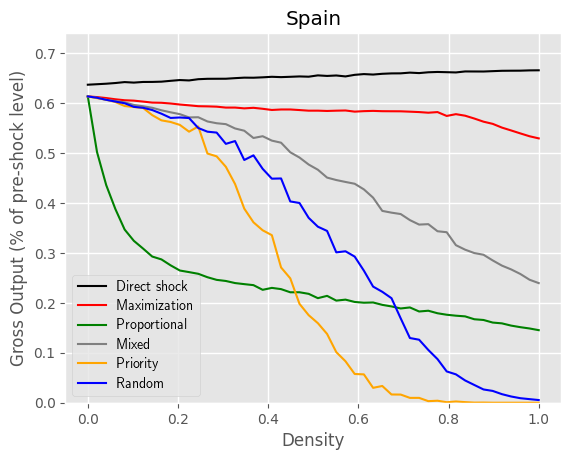

In [112]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.title("Spain")
plt.grid(visible=None, which='major', axis='both', linestyle='-', linewidth=1)

plt.plot(densseq, resdir_x, 'black')
plt.plot(densseq, resmax_x, 'red')
plt.plot(densseq, resprop_x, 'green')
plt.plot(densseq, resmixed_x, 'grey')
plt.plot(densseq, resprior_x, 'orange')
plt.plot(densseq, resrandom_x, 'blue')


#plt.xlim(-0.05, 1) 
plt.ylim(-0.00,0.74)
plt.rcParams['text.usetex'] = True
plt.xlabel('Density')
plt.ylabel("Gross Output (% of pre-shock level)")
plt.legend(['Direct shock', 'Maximization', 'Proportional', 'Mixed', 'Priority', 'Random'])
plt.savefig('plot_esp_density.png')

In [ ]:
def density_rationing(densseq, runs_dens, runs_rand):
    res1x = []
    res1f = []
    
    res2x = []
    res2f = []
    
    res3x = []
    res3f = []
    
    resdirx = []
    resdirf = []
    
    i = 1
    
    densseq = np.linspace(0,1,50)
    runs_rand = 50
    runs_dens = 50
    
    #xtot = np.identity(N)
    #Asum = np.identity(N)
    
    while i < len(densseq)-1:
        j=1
        while j < runs_dens:
            #A = np.array(df)[:55,:55]
            newdat = eliminate_rand(A, x_0, f_0, densseq[i])
            #Asum[i][j] = np.sum(newdat[2])/np.sum(newdat[0])
            #xtot[i][j] = np.sum(newdat[0])/np.sum(x_0)
            
            xmaxnew = np.ones(N)
            for k in range(0,N):
                xmaxnew[k] = newdat[0][k]*(1- supply_shock[k])
            resdirx.append(sum(xmaxnew)/sum(newdat[0]))
            
            #res1 = algo_proportional(newdat[1], newdat[2], f_max, xmaxnew, TT = 25, prioritize="no")
            
            #if res1[2] != 25:
             #   res1x.append(res1[0])
              #  res1f.append(res1[1])
           # else:
            #    res1x.append('NaN')
             #   res1f.append('NaN')
                
            j=j+1
        print('Iteration {0}'.format(i))
        i = i+1
    
    dataframe1 = {'x': resdirx, 'Algorithm': 'Direct shock'}
    df1 = pd.DataFrame(dataframe1)
    
    #dataframe2 = {'x': res2x, 'f': res2f, 'Scale': scalewhat, 'Algorithm': 'Mixed', 'a': seq }
    #df2 = pd.DataFrame(dataframe2)
    
    #dataframe3 = {'x': res3x, 'f': res3f, 'Scale': scalewhat, 'Algorithm': 'Priority', 'a': seq }  
    #df3 = pd.DataFrame(dataframe3)
    
    return df1

In [ ]:
#density_rationing(densseq, runs_dens, runs_rand)

In [ ]:
def eliminate_small(Z,A,x,f,nr_links_del):
    Anew = A
    Anew2 = A
    Znew = Z
    
    for i in range(0,N):
        for j in range(0,N):
            if Anew2[i][j]==0:
                Anew2[i][j] = 1000
                
    A_sorted = np.sort(Anew2, axis = None)
    
    for k in range(0,nr_links_del):
        m = A_sorted[k]
        for i in range(0,N):
            for j in range(0,N):
                if Anew[i][j] == m:
                    Znew[i][j] = 0
    xnew = np.sum(Znew, axis=1) + f
    for i in range(0,N):
        for j in range(0,N):
            Anew[i][j] = Znew[i][j]/x[j]
            
    Lnew = np.linalg.inv(np.identity(N)-Anew)
    #xnew = Znew + f
    
    return xnew, Anew, Lnew